-----

# Meal review - Basic data analysis
-----
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plaintext review. We also have reviews from all other Amazon categories.

## Import library

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk
nltk.download('punkt')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\火柴\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['.ipynb_checkpoints', 'kernel.ipynb', 'README.md', 'Reviews.csv']


-----
# Practice 1 - Peek for the dataset
-----

- Datapath = "../input/Reviews.csv"
- Using **pandas** to do the following task


## 1.1 Using pandas to read data from the csv file

In [14]:
# The data path of input file
data_path = "Reviews.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)

type(pd_data)

pandas.core.frame.DataFrame

## 1.2 Preview the data
-----
## Preview the first 5 rows of the dataset


In [15]:
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...



## The size of the dataset

In [16]:
pd_data.shape

(568454, 10)

## The column names

In [17]:
pd_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Read one column from DataFrame
- We read the column "Score" from dataframe "pd_data"
- Now, we have the Series "scores" 

In [18]:
scores = pd_data["Score"]
scores[:10], type(scores)

(0    5
 1    1
 2    4
 3    2
 4    5
 5    4
 6    5
 7    5
 8    5
 9    5
 Name: Score, dtype: int64, pandas.core.series.Series)

## Plot the distribution of the column "Score"

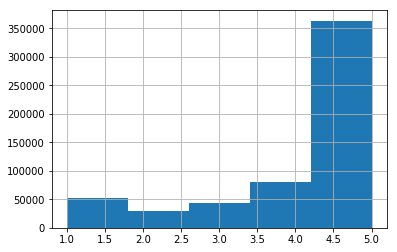

In [19]:
pd_data['Score'].hist(bins=5)

## Show the reviews by "Seanna"

In [20]:
pd_data[pd_data.ProfileName == 'Seanna'].head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
16665,16666,B001LGGH40,A12E0Y0J6584RT,Seanna,0,0,4,1238544000,Switch to Something New!,Switch is a wonderful all natural carbonated f...
45607,45608,B0041NYV8E,A12E0Y0J6584RT,Seanna,6,8,4,1332201600,May I have a Cup of Ginger Please?,The Gold Kili Ginger & Lemon Beverage is an al...
63358,63359,B002IEZJMA,A12E0Y0J6584RT,Seanna,0,0,4,1338768000,"Only for those who enjoy the darker, richer si...","The Illy Issimo Caffe drink is dark, rich and ..."
89684,89685,B002LANN56,A12E0Y0J6584RT,Seanna,0,0,5,1344643200,If I could give it 10 stars I would!,Chef Michael's Grilled Sirloin Dry Dog Food pu...
102412,102413,B001HTL2QE,A12E0Y0J6584RT,Seanna,0,0,4,1275696000,It's Water with a hint of Honeydew....,I recently purchased this water expecting to g...


-----
# Practice 2 - Text mining
-----
New link : https://www.kaggle.com/zake7749/introduction-to-text-analysis

## Labeling
- Binary classification : positive(1) or negative (0)
- If score is 5, label 1
- Otherwise, label 0

In [21]:
def mapping(x):
    if x > 4:
        return 1
    if x <= 4:
        return 0

pd_data['label']= pd_data['Score'].apply(mapping)

In [22]:
pd_data['label'].value_counts()

1    363122
0    205332
Name: label, dtype: int64

# Tokenize the sentences
- Split the sentence to list of words
    - By split
    - By word_tokenize in nltk
    - Lowercase and filter stopwords

In [ ]:
texts = pd_data.Text.values

### Tokenize the sentences (using "split" or "nltk")
##split_texts = [text.split(' ') for text in texts]
nltk_texts = [nltk.word_tokenize(text) for text in texts]

# Choose tokenized result (split/nltk)
texts = nltk_texts

labels = pd_data.label.values

# Stopword removal

In [12]:
# Read in stopword list from nltk
stopwords = set(nltk.corpus.stopwords.words())

nltk_stop_texts = []
for text in nltk_texts:
    nltk_stop_texts.append([word.lower() for word in text if word.lower() not in stopwords])
    
texts = nltk_stop_texts


In [13]:
def show_sentences(index):
    print("Original sentence:\n %s\n" % pd_data.Text.values[index])
    print("Tokenized by split:\n %s\n" % split_texts[index])
    print("Tokenized by nltk:\n %s\n" % nltk_texts[index])
    print("After stopwords removal:\n %s\n" % nltk_stop_texts[index])

show_sentences(5)

Original sentence:
 I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.

Tokenized by split:
 ['I', 'got', 'a', 'wild', 'hair', 'for', 'taffy', 'and', 'ordered', 'this', 'five', 'pound', 'bag.', 'The', 'taffy', 'was', 'all', 'very', 'enjoyable', 'with', 'many', 'flavors:', 'watermelon,', 'root', 'beer,', 'melon,', 'peppermint,', 'grape,', 'etc.', 'My', 'only', 'complaint', 'is', 'there', 'was', 'a', 'bit', 'too', 'much', 'red/black', 'licorice-flavored', 'pieces', '(just', 'not', 'my', 'particular', 'favorites).', 'Between', 'me,', 'my', 'kids,', 'and', 'my', 'husband,', 'this', 'lasted', 'only', 'two', 'weeks!', 'I', 'would', 

# Split training and validation set

In [14]:
def train_test_split(texts, labels, train_ratio):
    
    train_split = int(len(texts) * train_ratio)
    train_texts = texts[:train_split]
    train_labels = labels[:train_split]
    valid_texts = texts[train_split:]
    valid_labels = labels[train_split:]
    return train_texts, train_labels, valid_texts, valid_labels

train_texts, train_labels, valid_texts, valid_labels = train_test_split(nltk_texts, labels, 0.8)

# Word probability for each label
- pos_counter : count if word is in a positive comment
- neg_counter : count if word is in a negative comment
- words : count if word exists

In [15]:
pos_counter = {}
neg_counter = {}
words = {}

texts = train_texts
labels = train_labels


for text, label in zip(texts, labels):
    for word in text:
        if word in words:
            words[word] += 1
        else:
            words[word] = 1
            
        if label == 1:
            if word not in pos_counter:
                pos_counter[word] = 1
            else:
                pos_counter[word] += 1
        else:
            if word not in neg_counter:
                neg_counter[word] = 1
            else:
                neg_counter[word] += 1


# Calculate the word energy
- Word energy : pos_value / neg_value
- Filter the word probability < threshold

In [16]:
energy = {}
word_threhold = 500

for word in words:
    if words[word] > word_threhold:
        if word in pos_counter:
            pos_value = pos_counter[word]
        else:
            pos_value = 0

        if word in neg_counter:
            neg_value = neg_counter[word]
        else:
            neg_value = 0
        
        energy[word] = pos_value / (neg_value + 1e-10)

# Word cloud for each label

In [17]:
pos_keywords = [v[0] for v in sorted(energy.items(), key=lambda v: v[1], reverse=True)][:50]
neg_keywords = [v[0] for v in sorted(energy.items(), key=lambda v: v[1], reverse=False)][:50]

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(pos_keywords))

(-0.5, 399.5, 199.5, -0.5)

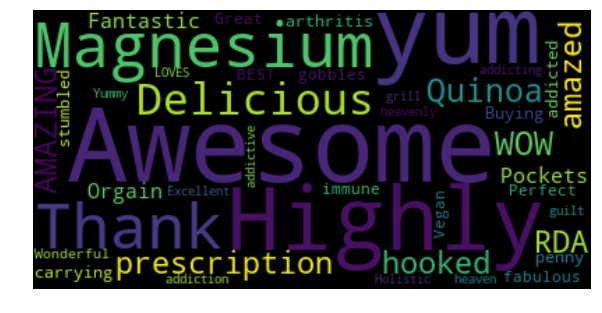

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Calculate the sentence score
- By summation of word score in sentence
- Normalize to 0~1

In [20]:
def get_score(text):
    score = 0
    for word in text:
        if word in energy:
            score += energy[word]
    return score/ len(text)

train_scores = pd.Series([get_score(text) for text in train_texts])

In [21]:
train_scores = train_scores / train_scores.max()

In [22]:
train_scores[:20]

0     0.246249
1     0.176938
2     0.236469
3     0.239609
4     0.271647
5     0.241862
6     0.270037
7     0.310791
8     0.239275
9     0.299896
10    0.258798
11    0.252634
12    0.258219
13    0.336196
14    0.289383
15    0.259573
16    0.283694
17    0.280418
18    0.213303
19    0.292136
dtype: float64

## Searching the best threshold

(0.24, 0.756290639300031)

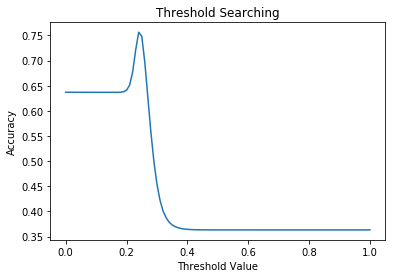

In [23]:
def threshold_searching(left=0, right=1, num_thresholds=101):
    record = []
    for i in np.linspace(left, right, num_thresholds):
        record.append(((train_scores > i).astype('int') == train_labels).sum() / len(train_texts))
    plt.title('Threshold Searching')
    plt.xlabel('Threshold Value')
    plt.ylabel('Accuracy')
    plt.plot(np.linspace(left, right, num_thresholds), record)
    best_train_threshold = np.linspace(left, right, num_thresholds)[record.index(max(record))]
    best_train_accuracy = max(record)
    return best_train_threshold, best_train_accuracy

best_train_threshold, best_train_accuracy = threshold_searching()
best_train_threshold, best_train_accuracy

In [24]:
valid_scores = pd.Series([get_score(text) for text in valid_texts])
valid_scores = valid_scores / valid_scores.max()

valid_accuracy = ((valid_scores > best_train_threshold).astype('int') == valid_labels).sum() / len(valid_texts)
valid_accuracy

0.6462428864202092